# Assumptions of linear regression

## Overview

* Recap of linear regression

* Error and the true model

* Assumptions of linear models

* Addressing linear model limitations

In this learning unit, we'll critically evaluate the assumptions of linear regression (and linear models in general).

These assumptions will be used to identify some of the limitations of linear models. We will then discuss different approaches that can be used to address these limitations. 

## Linear regression - a recap

* A statistical model which assumes linear relationship between input variables and output (dependent) variable
  
    - Maps a vector of $D$ input variables $[x_0, x_1, \dots, x_{D-1}]$ to a single, continuous, output variable $y$


* Can be used for formal statistical analysis (hypothesis testing)...

* ...as well as forecasting/prediction
  
    - This is equivalent to supervised regression!


* Has several advantages over more complex, non-linear machine learning models
  
    - Fast

    - Robust

    - Explainable and interpretable

Linear regression can be considered as both a method for statistical analysis as well as a supervised learning algorithm. As such, you will often find very different language and terminology used to describe the same concepts!

In this notebook, we mainly consider linear regression from the perspective of a supervised regression algorithm, where we predict a continuous output value (i.e. a *scalar*) from a vector of one or more input variables. 

Linear regression is one of the simplest models you can use for this task, and is often used as a benchmark when testing more complex algorithms. 

However, linear regression is still widely used across many domains, even when more complex models can give better predictive performance.

This is primarily because the simple structure of linear regression means that it is:

* very fast to estimate and make predictions with;

* very easy to interpret and, better still, explain the relationships in the model from the parameter values; 

* robust, in that the modeller explicitly knows the impacts of each input feature (e.g. positive or negative impact on the output), which is constant over any range of feature values in the feature space. 

It is also very data efficient - it can be estimated on a small number of data points and can handle a wide variety of input data (though this may need to be regularised, normalised or standardised first) and comes with few restrictions.

## Linear regression: error term

Let's reintroduce the equation for the linear regression model - we can just consider the simplest case - univariate linear regression with a single input feature:

$$
\hat{y} = wx+b
$$

It is useful to explicitly include the *error* or *residual* in our notation. 

The linear regression model makes a prediction $\hat{y}$ that is an estimate of the true value of the ground-truth $y$. 

Specifically, we have:

$$
y = \hat{y} + \varepsilon \\
$$

where $\varepsilon$ is an error term (or residual), drawn from a distribution. 

In other words, for the simplest case of univariate regression, we have

$$
y = wx+b+\varepsilon
$$

$\varepsilon$ captures everything that is **not explained** by our model. 

### Finding the true model

When performing formal statistical analysis using linear regression, typically we consider the question: 

* is our proposed model the true model? 

In other words, is the model we have proposed the one that has actually generated the data. Obviously, we can never recreate the data generation process exactly, as there is always noise in any real-world data. This is what is represented by $\varepsilon$ - the portion of the data generation process that can not be modelled further as it is just random noise. 

Our goal is therefore to try and capture as much as possible in the regression model. 

If our model is the *true model* than $\varepsilon$ should be purely *random noise* with *zero mean* and *constant variance*. 

### Machine learning and the true model

In practice, in machine learning, we are not worried with trying to find the *true model*. 

Our goal is instead to pragmatically find the model which generates predictions $\hat{y}$ which most closely match the ground-truth $y$. 

However, we can still understand the assumptions (and therefore limitations) of linear regression by thinking about these errors in more detail. 

## Assumptions of linear regression

Linear regression is a *linear model* - this is because it uses a set of constant weights and a bias term (collectively known as the model *parameters*) thus enforcing a linear relationship between the inputs and model predictions. 

This linearity between inputs and output is an *assumption* of linear models. In other words, by using the model, you are in affect assuming there is a linear relationship between the inputs and outputs. 

There are in fact several assumptions of linear regression. 

1. *Linearity*
    * Relationship between each feature $x_d$ and $y$ is linear.

2. *Homoscedasticity* (constant variance)

    * The variance of the error term is constant over the input feature space (i.e the error term has the same distribution over any values of the input $\mathbf{x}$).

3. *Independence*
   
    * The observations in the dataset are generated independently, such that there is no correlation between the error terms.

4. *Normality*
  
    * The error terms are normally distributed.

5. *Lack of multicollinearity*

    * The input features/independent variables are not correlated with one-another

We will go through each of these assumptions in turn. 

#### Linear models for classification - logistic regression

_**NOTE**: Another linear model you may have come across (or at least are likely to come across in the future) is *logistic regression* - used for *supervised classification* of discrete data (e.g. binary True or False labels.) As logistic regression is also a linear model, the assumptions introduced in this notebook also largely apply to logistic regression as well!_

## Assumption 1: linearity

As the model is linear, we assume that the change in $y$ due to a unit change in a feature $x_d$ is constant over any value of the feature $x_d$, independent of all other features. 

For example, for a house price prediction problem, we would assume increasing the total floorspace of a house by $1m^2$ increases the price by the same amount no matter what size of the house, independent of the other features (e.g. number of rooms, location, etc.)

We can easily test this assumption by generating scatter plots of the input features against the target.

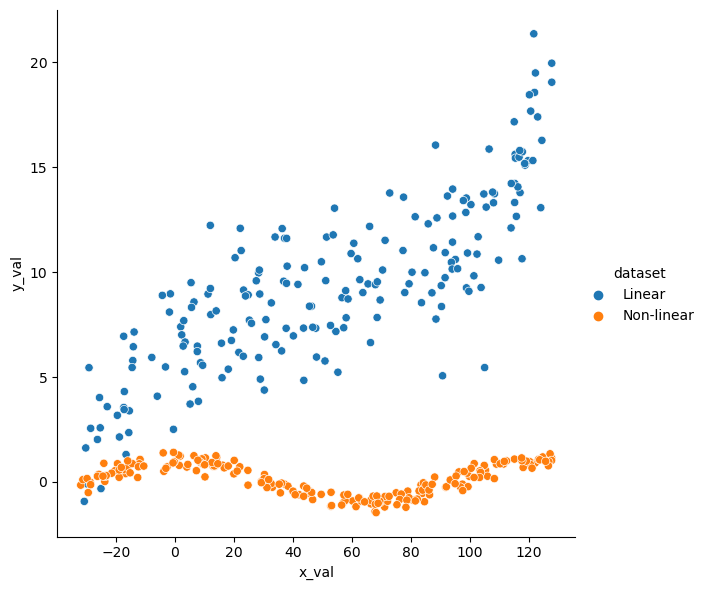

In [1]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("data/data.csv")

sns.relplot(data=data, x="x_val", y="y_val", hue="dataset", height=6)

In this example, we can see there is one feature that has a linear relationship with the output (albeit with lots of noise) and one that is clearly non-linear (with a sinusoidal shape).

The linear model may be able to capture well the relationship between the linear feature and output, but would not be able to capture the relationship between the sinusoidal feature and the output at all, resulting in worse model fit and less accurate model predictions. 

#### Addressing non-linearities

There are two main methods to deal with non-linear relationships between the input features and the target:
1. *feature engineering*: explicitly including non-linear transformations of the variables as additional input features, or
2. *non-linear models*: making use of more complex model structures that can inherently capture non-linear relationships. 

Where non-linear relationships are present, these steps can ensure better out of sample predictions from the model. 

## Assumption 2: homoscedasticity (constant variance)

The linear regression model assumes that $\varepsilon$ has constant variance. In other words, we assume that the model has *identically distributed* error terms. 

If $\varepsilon$ does not have constant variance (i.e. it is *heteroscedastic*), such that it is correlated with the model predictions, it means that the model has not captured all of the relationship between inputs and outputs.

For example, consider again a model which predicts house prices. This assumption states that the error of model predictions has constant variance for all predicted values - if the standard deviation of the error for a prediction £1million is £100,000 (such that the house price has a 99% chance of being in the range £700,000 - £1.3 million), then it should also be £100,000 for a predicted house price of £150,000. Clearly this same standard deviation is too large compared to the prediction, and will result in a worse overall fit (and therefore less accurate predictions for unseen data). 

#### Addressing heteroscedasticity

We can often resolve heteroscedasticity by *transforming* our target variable.

In our house-price example, where the price is strictly positive (i.e. we can't have a negative price) and the errors are likely to be proportional to the size of the predictions, we can use a log-transformation of the price as our target $y$. 
This is because a proportion of a value is represented by a constant value in the log-transform, and so the error for the log-transformed price would be constant. 

This should result in a better model fit and better out of sample predictions. 

## Assumption 3: independence

As well as assuming that the the error term is identically distributed (i.e. has constant variance), we also assume each value of the error term is drawn *independently* from the distribution (i.e. it is random noise).

In practice, this means that the error terms should not be correlated with one another, which should occur if all of our data points are generated independently. 

In combination, the assumption of independent and constant-variance error terms is referred to as _i.i.d._ or independent and identically distributed error terms. 

Some data has clear correlations, where observations are dependent on other observations in the dataset e.g. with *time-series* data. 

#### Addressing correlated data

For data with clear correlated structures, we must take steps to address that structure. This could include:
* using models which explicitly capture the correlations between observations (e.g. autoregressive or time-series models), 
* transforming the data in a way that each row can be considered as independent. 

## Assumption 4: normality

When we optimise the model parameters for OLS (ordinary least squares, in other words selecting parameters that minimise the sum of squared errors), we assume that the error terms in the model are distributed normally. 

#### Addressing non-normal residuals

In practice, for machine learning applications (where we are not performing formal hypothesis testing on model parameters) this assumption is less important, as we care only about how well the model predicts out of sample data. Furthermore, with large datasets the assumption also becomes less limiting. As such, it is often ignored.

However, in certain very specific applications where the error terms are not normally distributed, we can address this assumption by using different *cost functions* to select model parameters which can result in better predictive performance.

## Identifying violations of the assumptions

For the above assumptions, it is possible to identify violation of the assumptions by investigating the distributions of the model errors. 

Homoscedasticity, independence, and normality are all assumptions made on the residuals themselves - we can therefore verify them by investigating the distributions of the residuals.

Meanwhile, violating the linearity assumption by including features that have non-linear impacts on the output will itself impact the distribution of the error terms.

To understand better, let's try this out in Python.

Text(0, 0.5, '$\\varepsilon$ against $\\hat{y}$')

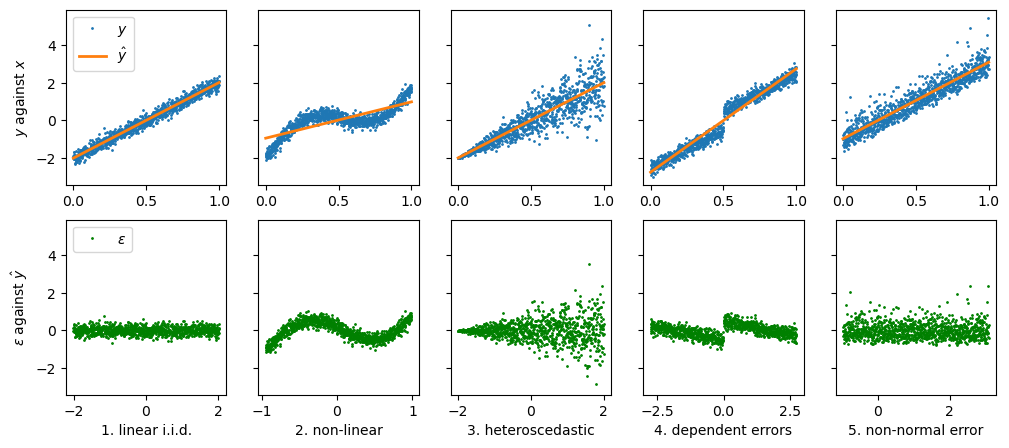

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

lr = LinearRegression()  # This is our linear model we will fit to the data

# Generate synthetc data:
x = np.linspace(0, 1, 1000)

np.random.seed(42)  # fix random seed to ensure same results each time

y0 = 4 * x - 2 + np.random.normal(0, 0.2, 1000)  # linear with i.i.d error
y1 = (
    4 * x - 2 + np.sin(6 * x) + np.random.normal(0, 0.2, 1000)
)  # non-linear with i.i.d error
y2 = (
    4 * x - 2 + 5 * x * np.random.normal(0, 0.2, 1000)
)  # linear with proportional error
y3 = -2 + np.concatenate(
    [
        4 * x[:500] + np.random.normal(-0.5, 0.2, 500),
        4 * x[500:] + np.random.normal(0.5, 0.2, 500),
    ]
)  # linear with non-independent error term
y4 = 4 * x - 2 + np.random.lognormal(0, 0.4, 1000)  # linear with lognormal error

y = [y0, y1, y2, y3, y4]
labels = [
    "1. linear i.i.d.",
    "2. non-linear",
    "3. heteroscedastic",
    "4. dependent errors",
    "5. non-normal error",
]

# Fit linear regression model to each dataset and generate predictions
y_pred = []
w = []
b = []

for yi in y:
    lr.fit(x.reshape(-1, 1), yi)
    y_pred.append(lr.predict(x.reshape(-1, 1)))  # store the predictions of each model
    w.append(lr.coef_[0])  # store the weights of each model
    b.append(lr.intercept_)  # store the bias terms of each model

# calculate residuals for each model
res = [y[i] - y_pred[i] for i in range(5)]

# Plot the ground-truth and the fitted model against x (top row)
# as well as the residuals against the model predictions (bottom row)
fig, axs = plt.subplots(2, 5, sharex=False, sharey=True, figsize=(12, 5))
for i in range(5):
    # scatter plot of original data
    axs[0, i].plot(x, y[i], ".", ms=2)
    # plot of fitted model on same axis
    axs[0, i].plot(x, w[i] * x + b[i], lw=2)
    # plot of residuals against predicted values
    axs[1, i].plot(y_pred[i], res[i], ".", ms=2, color="g")
    axs[1, i].set_xlabel(labels[i])

axs[0, 0].legend([r"$y$", r"$\hat{y}$"], loc="upper left")
axs[0, 0].set_ylabel(r"$y$ against $x$")
axs[1, 0].legend([r"$\varepsilon$"], loc="upper left")
axs[1, 0].set_ylabel(r"$\varepsilon$ against $\hat{y}$")

The top row of plots show the original data for each data generation function ($y$ against $x$) in blue, as well as the fitted model in orange. 

The bottom row of plots then show the residuals ($y-\hat{y}$) plotted against the model predictions ($\hat{y}$) in green.

Note that as we plot the residuals against the predictions (and not $x$) we can generate these plots for models with any number of input features (the top row plots are only possible for univariate data). 

Notice how only the data generated from a linear data generation process with i.i.d. error (the plot on the top left left) results in constant variance normally distributed residuals (bottom left). 

All of the rest of the data generation processes result in clear artifacts in the residuals plots (the bottom row of plots).

You can modify the code above to try testing other data generation processes!

For the non-normal errors (bottom right) - we can actually formally test whether the distribution of the residuals is using a [*Shapiro-Wilk test*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html):

In [3]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normal residuals
p0 = shapiro(res[0]).pvalue

# Shapiro-Wilk test for non-normal residuals
p4 = shapiro(res[4]).pvalue

print(f"p-value of Shapiro-Wilk test on normal residuals: {p0:.3f}")
print(f"p-value of Shapiro-Wilk test on non-normal residuals: {p4:.3f}")

p-value of Shapiro-Wilk test on normal residuals: 0.672
p-value of Shapiro-Wilk test on non-normal residuals: 0.000


The p-value of the Shapiro-Wilk test is less than 0.05 for the residuals for the non-normal error, which means that these residuals are not normally distributed at a 95% confidence interval.

## Assumption 5: lack of multicollinearity 

Unlike the previous assumptions, which relate to the targets ($y$) and the residuals ($\varepsilon$), this assumption relates to the input *features* ($x$) and the parameters ($w$ and $b$). 

Recall that the linear regression parameters (weights and bias term) allow us to interpret the model, and perform hypothesis testing. 

In order for this to be true, the input features should not be highly correlated to one another. 

If two features are highly correlated, the model weights will be "split" across those two features, therefore giving a false indication of importance. 

We can identify this by looking at the pairwise correlation of the columns, e.g. using a heatmap. 

Note we can automatically calculate the Pearson correlation coefficient in [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) with the `.corr()` function

<Axes: >

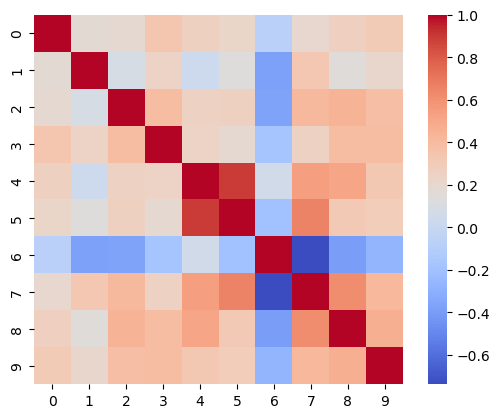

In [4]:
import seaborn as sns
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = pd.DataFrame(diabetes["data"])

# Draw a heatmap of the cros-correlation matrix
sns.heatmap(X.corr(), cmap="coolwarm", square=True)

Notice how columns 4 and 5 have a strong positive correlation, and columns 6 and 7 have a strong negative correlation. 

This will result in the weights for each of these columns being less reliable for interpretation and testing. 

#### Addressing multicollinearity

There are three main methods for addressing multicollinearity:
* Manually removing correlated features
* Using *dimensionality reduction* techniques like *Principal component analysis* to remove correlated features
* Using L1 *regularisation* (LASSO) to perform feature selection, by reducing small magnitude weights to zero 

However, as with the normality assumption, in purely predictive machine learning applications, where we do not care about interpreting the parameter values, this assumption has less impact on model results, and so is often ignored. 



## Outliers

One special case where several of the above assumptions are violated is the presence of *outliers*, i.e. extreme values from outside the expected distribution of our data.

The following example shows how strong an impact outliers can have on our model. 

First let's generate some linear data and plot our fitted model

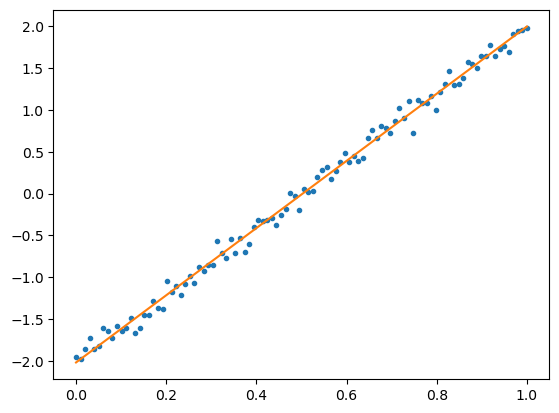

In [5]:
x = np.linspace(0, 1, 100)

np.random.seed(42)  # fix random seed to ensure same results each time

y = 4 * x - 2 + np.random.normal(0, 0.1, 100)

lr = LinearRegression().fit(x.reshape(-1, 1), y)

plt.plot(x, y, ".")
plt.plot(x, lr.coef_[0] * x + lr.intercept_)

Now we can add a few extreme values - we can use 5 points from a 2D Gaussian, centred on the point (0.1,1.9)

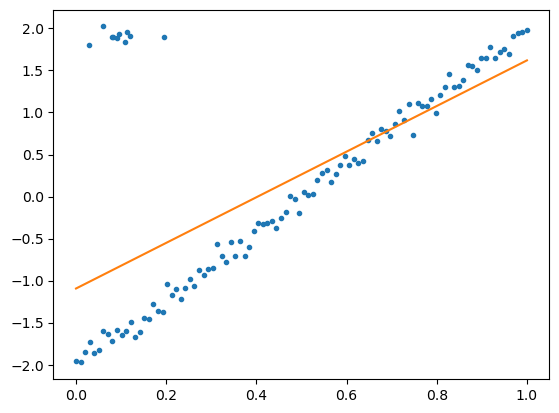

In [6]:
x_noisy = np.concatenate([x, np.random.normal(0.1, 0.05, 10)])
y_noisy = np.concatenate([y, np.random.normal(1.9, 0.05, 10)])

lr = LinearRegression().fit(x_noisy.reshape(-1, 1), y_noisy)

plt.plot(x_noisy, y_noisy, ".")
plt.plot(x, lr.coef_[0] * x + lr.intercept_)

Notice how the extreme values have had a very strong impact on our linear regression model fit, so that the resulting weight and bias terms no longer fit out data properly. 

#### Addressing outliers

There are two primary methods to deal with outliers:
* Attempt to remove outliers from the data
* Use a different cost function (i.e. apart from OLS) that deals with outliers

As an example, let's try out the [*Huber regressor*](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn.linear_model.HuberRegressor) from scikit-learn on our data. 

Instead of using OLS, the Huber regressor minimises a modified squared loss that is more robust to outliers:

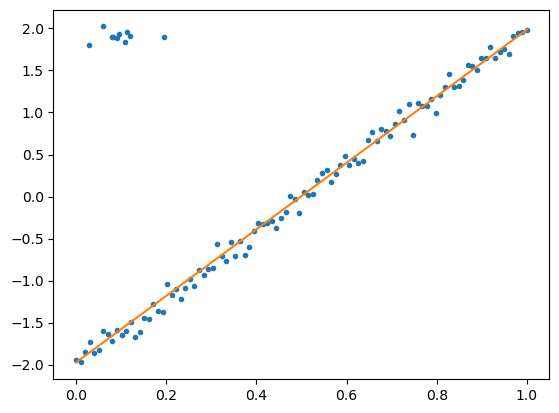

In [7]:
from sklearn.linear_model import HuberRegressor

lr = HuberRegressor().fit(x_noisy.reshape(-1, 1), y_noisy)

plt.plot(x_noisy, y_noisy, ".")
plt.plot(x, lr.coef_[0] * x + lr.intercept_)

## Linear regression - summary and limitations in practice

* For machine learning applications, the primary limitation of linear regression is the assumption that the relationships between input features and the target are linear. 
  
  * The assumption of linearity does not hold in most real world cases

  * However, we can deal with this using *feature engineering*

* For applications where we are interpreting the model parameters, another major limitation is the assumption that there is a lack of multicollinearity

  * Real-world data often contains correlated features (particularly when there are a large number of features)

  * We can deal with this using *feature reduction*

* For the remaining assumptions (homoscedasticity, independence, and normality) these are important for the specific cases where they are violated. You should be careful when applying linear regression to:

  * *Long tailed target variables* (e.g. prices, salaries, etc.) - hese are likely to have proportional (heteroscedastic) error terms, which can be dealt with by taking log transformations of the target

  * *Time-series or spatial data* - these are likely to contain strong correlations between observations. This can be dealt with by using time-series models. 